# Курсовая работа по дисциплине "Машинное обучение"
Выполнила Крижановская Анна, группа 109

## Датасет Telco Customer Churn
Этот датасет содержит информацию о телекоммуникационной компании и её клиентах. Цель состоит в том, чтобы предсказать отток клиентов – то есть, кто из клиентов, вероятно, покинет компанию.

### Описание признаков:
- **customerID**: ID клиента
- **gender**: Пол клиента (Female, Male)
- **SeniorCitizen**: Является ли клиент пожилым гражданином (1 = Да, 0 = Нет)
- **Partner**: Есть ли у клиента партнёр (Yes, No)
- **Dependents**: Есть ли у клиента иждивенцы (Yes, No)
- **tenure**: Количество месяцев, в течение которых клиент был в компании
- **PhoneService**: Есть ли у клиента телефонная связь (Yes, No)
- **MultipleLines**: Есть ли у клиента несколько телефонных линий (Yes, No, No phone service)
- **InternetService**: Тип интернет-сервиса у клиента (DSL, Fiber optic, No)
- **OnlineSecurity**: Есть ли у клиента онлайн-безопасность (Yes, No, No internet service)
- **OnlineBackup**: Есть ли у клиента онлайн-резервное копирование (Yes, No, No internet service)
- **DeviceProtection**: Есть ли у клиента защита устройств (Yes, No, No internet service)
- **TechSupport**: Есть ли у клиента техническая поддержка (Yes, No, No internet service)
- **StreamingTV**: Есть ли у клиента потоковое ТВ (Yes, No, No internet service)
- **StreamingMovies**: Есть ли у клиента потоковые фильмы (Yes, No, No internet service)
- **Contract**: Тип контракта клиента (Month-to-month, One year, Two year)
- **PaperlessBilling**: Использует ли клиент безбумажный счёт (Yes, No)
- **PaymentMethod**: Метод оплаты клиента (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: Сумма, взимаемая с клиента ежемесячно
- **TotalCharges**: Общая сумма, взимаемая с клиента
- **Churn**: Отток – покинул ли клиент компанию в течение последнего месяца (Yes, No) - Целевая переменная

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем опции для лучшего отображения DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Загрузка датасета:

In [2]:
try:
    df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: файл 'WA_Fn-UseC_-Telco-Customer-Churn.csv' не найден. Убедитесь, что он находится в той же директории.")
    # df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-apache-spark/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")
    # print("Попытка загрузки датасета по URL.")
    pass

Датасет успешно загружен.


### Предварительный просмотр данных:

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

## Изучим датасет:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Датасет содержит 7043 записи (строки) и 21 признак (столбец).
Большинство столбцов имеют тип object, что указывает на категориальные данные или строки.
Числовые признаки SeniorCitizen, tenure, MonthlyCharges имеют соответствующий тип (int64 или float64).
Особое внимание стоит обратить на столбец TotalCharges, который имеет тип object, но по сути должен быть числовым. Это говорит о наличии нечисловых значений, таких как пробелы, которые необходимо будет обработать.

In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
df.describe(include='object')

customerID gender Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling     PaymentMethod TotalCharges Churn
count         7043   7043    7043       7043         7043          7043            7043           7043         7043             7043        7043        7043            7043            7043             7043              7043         7043  7043
unique        7043      2       2          2            2             3               3              3            3                3           3           3               3               3                2                 4         6531     2
top     3186-AJIEK   Male      No         No          Yes            No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes  Electronic check         20.2    No
freq             1   3555    3641       4933         6361          3390            3096           3498         3088             3095        3473        2810            2785            3875             4171              2365           11  5174

## Очистка данных и их подготовка

In [7]:
# Удаляем столбец customerID, так как это просто идентификатор и не является признаком для обучения
df.drop(['customerID'], axis=1, inplace=True)
print("Столбец 'customerID' удалён.")

Столбец 'customerID' удалён.


In [8]:
# Проверяем TotalCharges - он должен быть числовым, но df.info() показал 'object'
# Вероятно, там есть пустые строки или пробелы, которые мешают конвертации в числовой формат.
# Заменим пробелы на NaN и затем преобразуем в числовой тип.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Столбец 'TotalCharges' преобразован в числовой тип. Значения, которые не удалось преобразовать, заменены на NaN.")

Столбец 'TotalCharges' преобразован в числовой тип. Значения, которые не удалось преобразовать, заменены на NaN.


### Поиск пропущенных значений:

In [9]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Как видно, пропуски есть только в TotalCharges. Поскольку их очень мало (11 из 7043), мы можем удалить эти строки. В других случаях можно было бы рассмотреть импутацию (например, медианой).

In [10]:
# Удаляем строки с NaN (в данном случае, только для TotalCharges)
df.dropna(inplace=True)
print("Строки с пропущенными значениями удалены.")

Строки с пропущенными значениями удалены.


In [11]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Разведочный анализ данных (EDA)

In [12]:
# Разделяем признаки на числовые и категориальные для дальнейшего анализа
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

# Удаляем целевую переменную 'Churn' из списка категориальных для анализа признаков
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Категориальные признаки: {categorical_cols}")
print(f"Числовые признаки: {numerical_cols}")

Категориальные признаки: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Числовые признаки: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Анализ распределения числовых признаков и выбросов:

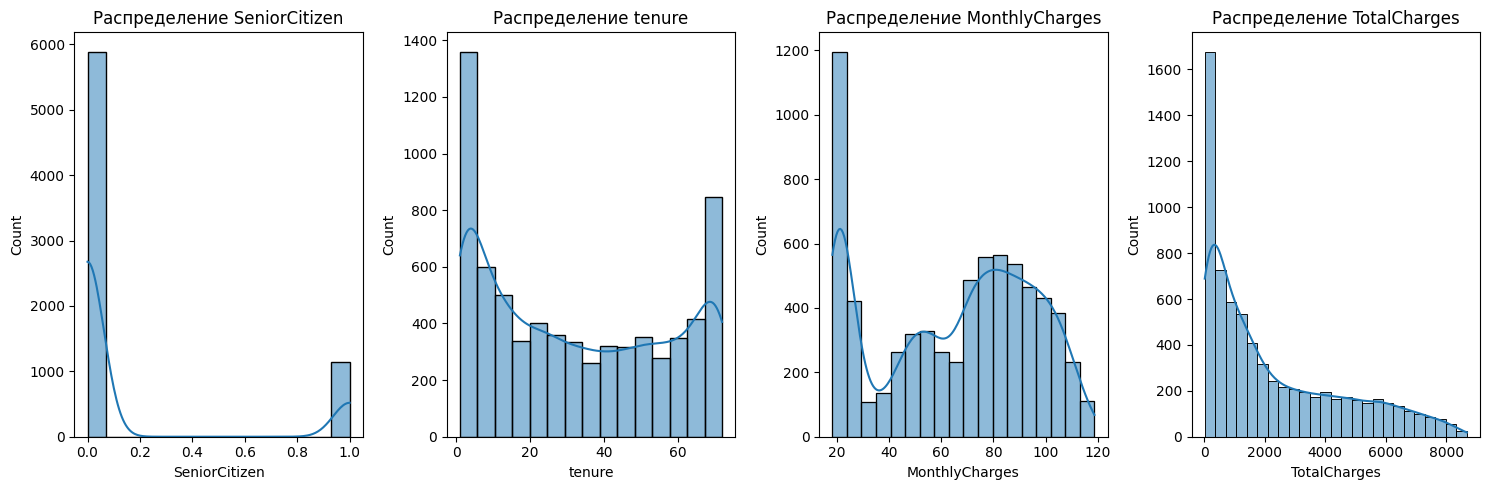

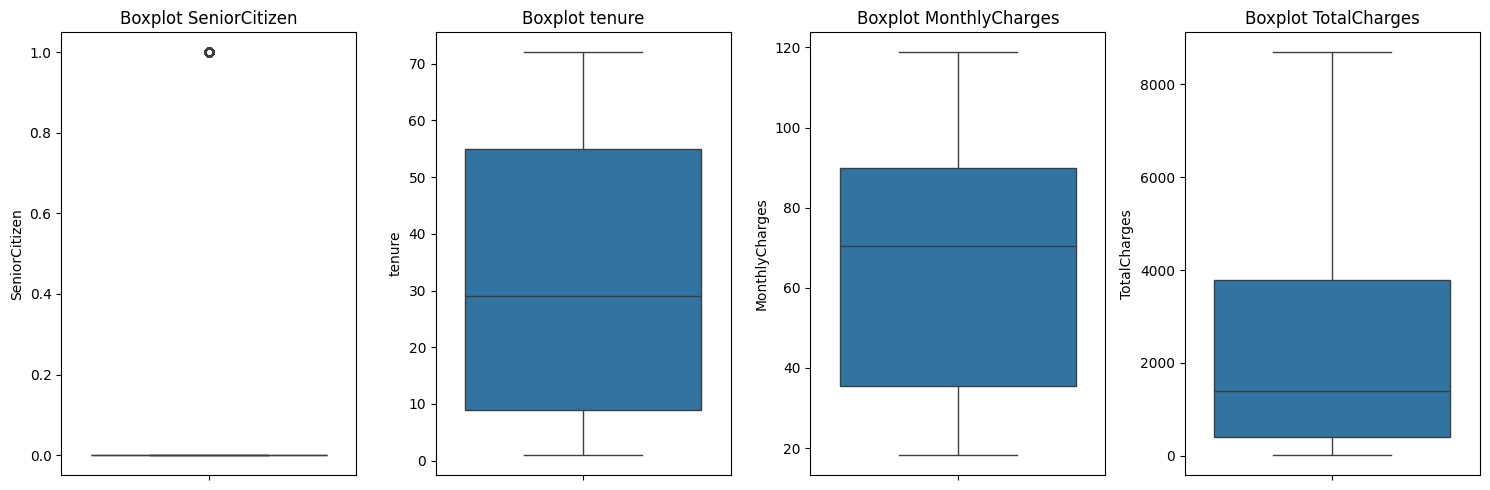

In [13]:
# Гистограммы для числовых признаков
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# Boxplot для числовых признаков, чтобы увидеть выбросы
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

### Анализ категориальных признаков относительно целевой переменной 'Churn':

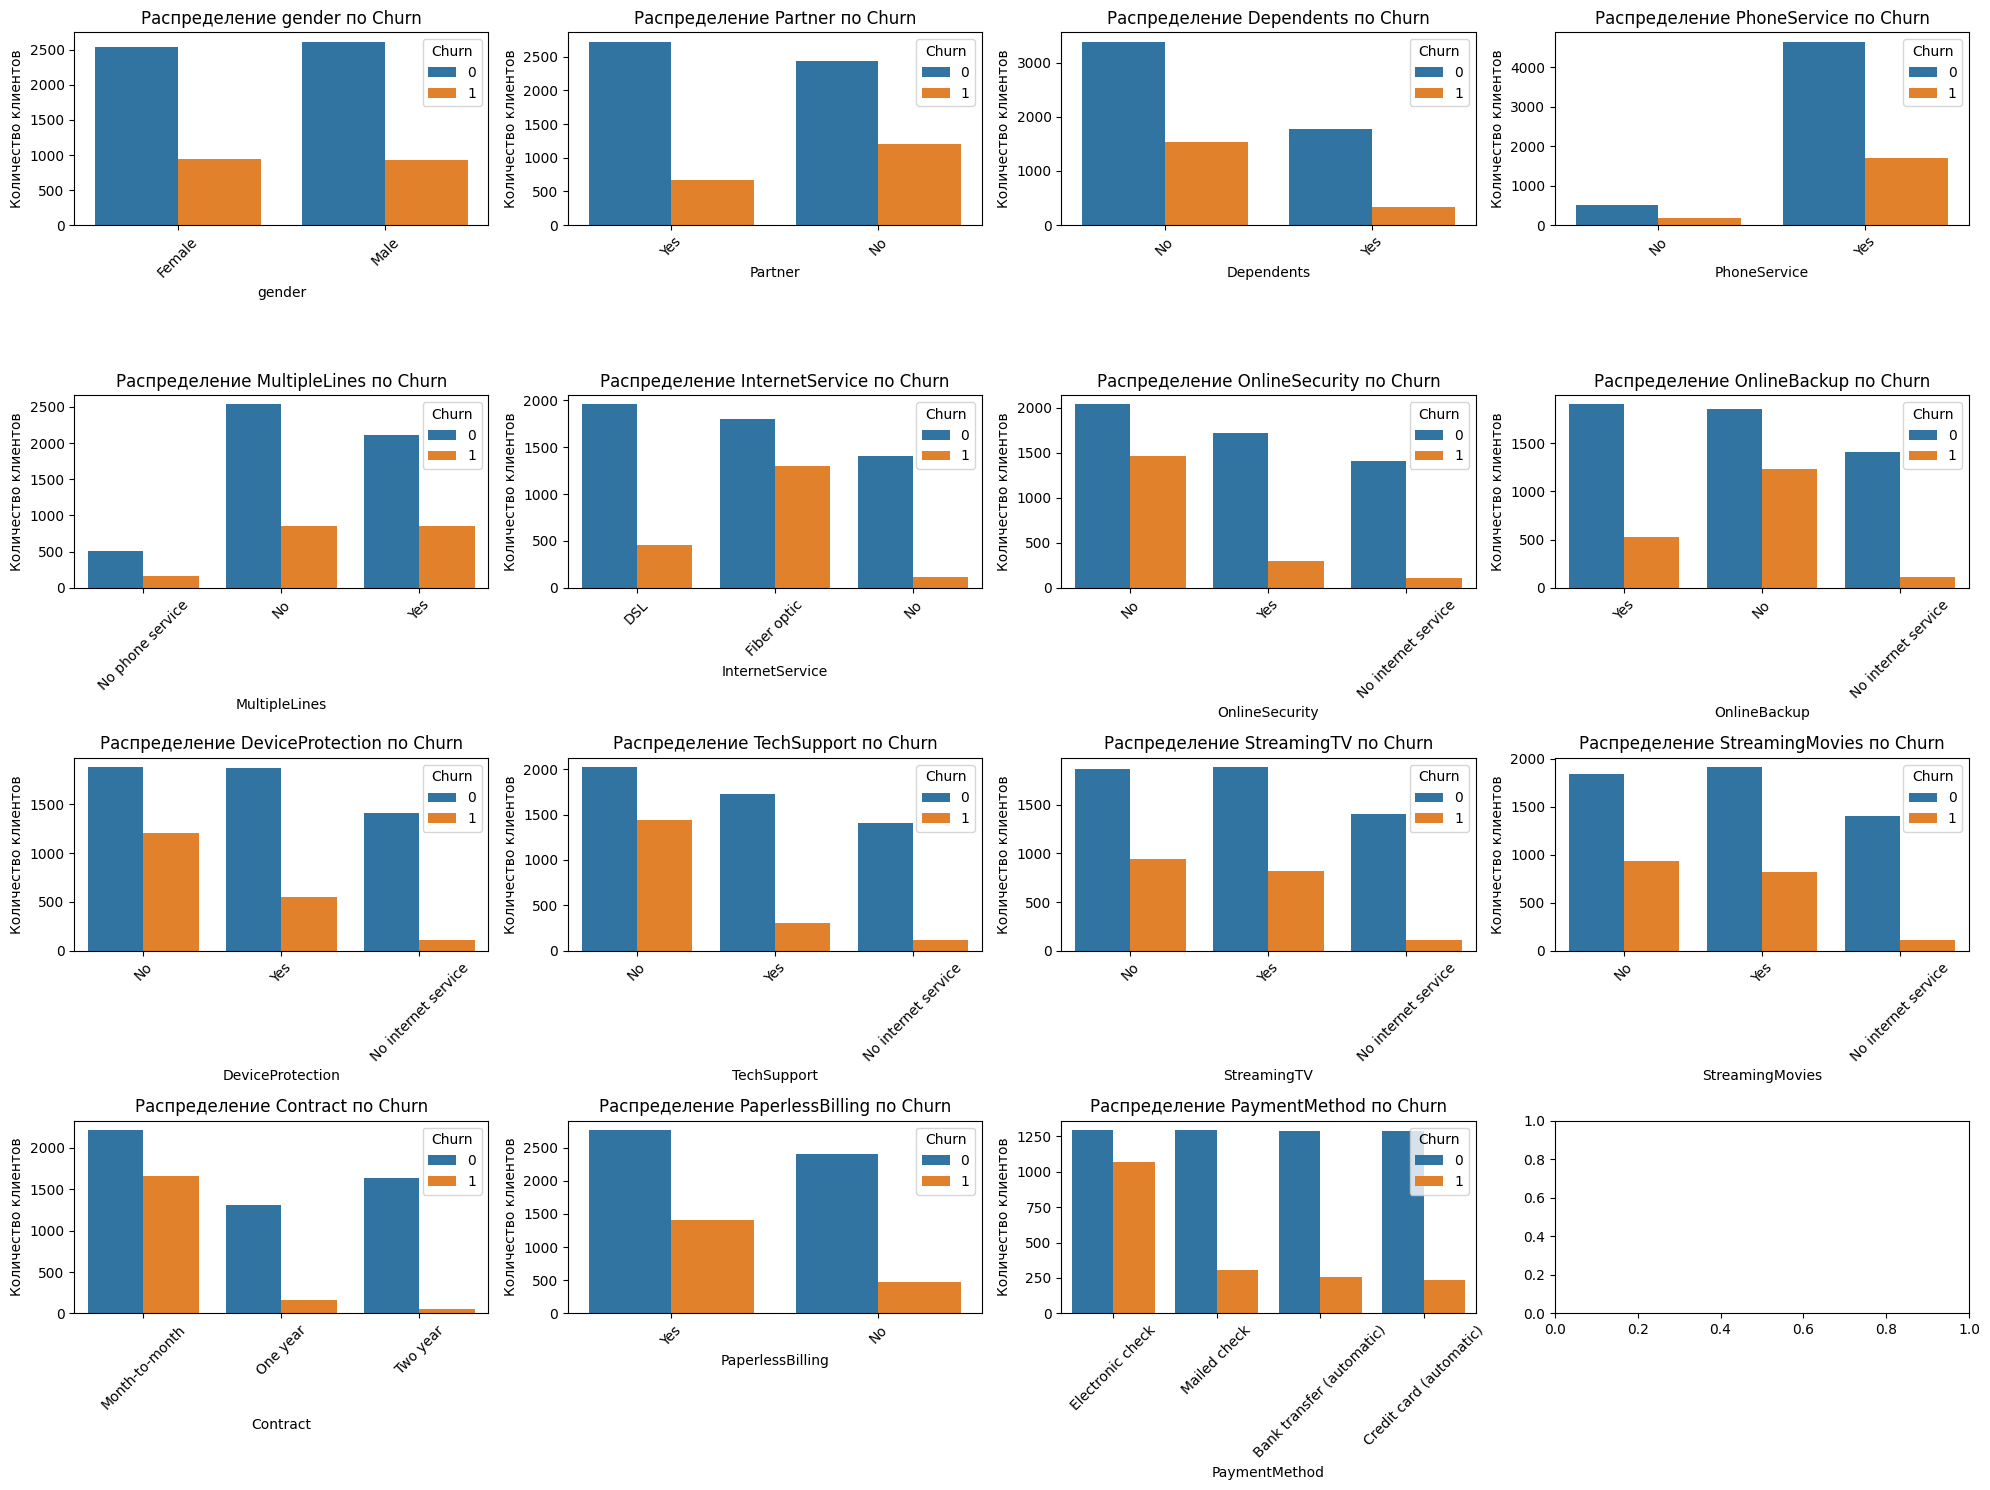

In [14]:
# Изменяем значения целевой переменной 'Churn' на 0 и 1 для удобства анализа
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Построение графиков для категориальных признаков против целевой переменной
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten() # Преобразуем 2D массив осей в 1D

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Распределение {col} по Churn')
    axes[i].tick_params(axis='x', rotation=45) # Поворачиваем метки для читаемости
    axes[i].set_ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

### Корреляционный анализ числовых признаков:

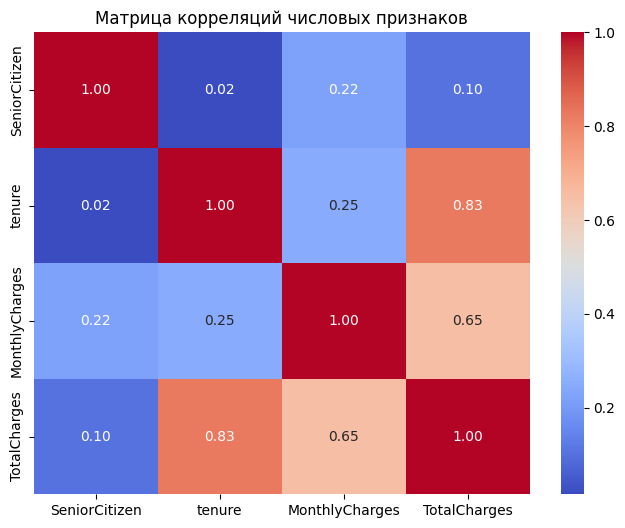


Топ-5 пар числовых признаков по корреляции:
tenure          TotalCharges      0.825880
MonthlyCharges  TotalCharges      0.651065
tenure          MonthlyCharges    0.246862
MonthlyCharges  SeniorCitizen     0.219874
SeniorCitizen   TotalCharges      0.102411
dtype: float64


In [15]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# Смотрим топ-5 пар числовых признаков, которые сильнее всего коррелируют между собой
print("\nТоп-5 пар числовых признаков по корреляции:")
corr_unstacked = corr.unstack()
corr_unstacked_sorted = corr_unstacked.sort_values(ascending=False)
# Отфильтровываем самокорреляции (correlation = 1) и дубликаты (A-B и B-A)
unique_corr_pairs = corr_unstacked_sorted[corr_unstacked_sorted < 1].drop_duplicates().head(5)
print(unique_corr_pairs)

#### Вывод по корреляции числовых признаков:
Из матрицы корреляций видно, что между признаками tenure (срок пребывания клиента) и TotalCharges (общая сумма списаний) наблюдается очень сильная положительная корреляция (0.83). Это логично, так как чем дольше клиент пользуется услугами, тем больше будут его общие списания, при условии стабильных ежемесячных платежей.

Между MonthlyCharges (ежемесячные списания) и TotalCharges также есть положительная корреляция (0.65), но она слабее, чем с tenure, поскольку TotalCharges — это накопительная сумма.
Наличие высокой корреляции между tenure и TotalCharges может указывать на мультиколлинеарность. Однако, в данном случае, обе переменные содержат уникальную информацию (tenure - длительность, TotalCharges - общий объем расходов, который также зависит от MonthlyCharges), и XGBoost в целом устойчив к мультиколлинеарности. Поэтому, решение об удалении одного из признаков не является обязательным. Для данной задачи и выбранной модели, я сохраню оба признака, полагая, что они могут приносить дополнительную информацию.
Другие числовые признаки (SeniorCitizen) имеют очень слабую корреляцию друг с другом, что является хорошим показателем.

### Корреляция признаков с целевой переменной:

In [16]:
from scipy.stats import spearmanr, chi2_contingency

print("Корреляция числовых признаков с 'Churn' (Spearman):")
for col in numerical_cols:
    correlation, p_value = spearmanr(df[col], df['Churn'])
    print(f'{col}: Correlation={correlation:.3f}, p-value={p_value:.3f}')

print("\nВзаимосвязь категориальных признаков с 'Churn' (Cramer's V):")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    # Handle cases where min(contingency_table.shape) - 1 is 0
    divisor = (n * (min(contingency_table.shape) - 1))
    cramers_v = np.sqrt(chi2 / divisor) if divisor != 0 else 0
    print(f"{col}: Cramer's V={cramers_v:.3f}, p-value={p:.3f}")

Корреляция числовых признаков с 'Churn' (Spearman):
SeniorCitizen: Correlation=0.151, p-value=0.000
tenure: Correlation=-0.370, p-value=0.000
MonthlyCharges: Correlation=0.184, p-value=0.000
TotalCharges: Correlation=-0.232, p-value=0.000

Взаимосвязь категориальных признаков с 'Churn' (Cramer's V):
gender: Cramer's V=0.008, p-value=0.490
Partner: Cramer's V=0.150, p-value=0.000
Dependents: Cramer's V=0.163, p-value=0.000
PhoneService: Cramer's V=0.011, p-value=0.350
MultipleLines: Cramer's V=0.040, p-value=0.004
InternetService: Cramer's V=0.322, p-value=0.000
OnlineSecurity: Cramer's V=0.347, p-value=0.000
OnlineBackup: Cramer's V=0.292, p-value=0.000
DeviceProtection: Cramer's V=0.281, p-value=0.000
TechSupport: Cramer's V=0.343, p-value=0.000
StreamingTV: Cramer's V=0.230, p-value=0.000
StreamingMovies: Cramer's V=0.231, p-value=0.000
Contract: Cramer's V=0.410, p-value=0.000
PaperlessBilling: Cramer's V=0.191, p-value=0.000
PaymentMethod: Cramer's V=0.303, p-value=0.000


#### Вывод по взаимосвязи признаков с целевой переменной:
Числовые признаки с Churn (корреляция Спирмена):
* tenure: -0.355 (p-value 0.000). Сильная отрицательная корреляция. Это логично: чем дольше клиент с компанией, тем меньше вероятность его оттока.
* MonthlyCharges: 0.194 (p-value 0.000). Умеренная положительная корреляция. Более высокие ежемесячные платежи могут быть связаны с более высоким уровнем оттока, возможно, из-за неудовлетворенности ценой.
* TotalCharges: -0.198 (p-value 0.000). Умеренная отрицательная корреляция. Также логично: клиенты с большими общими списаниями, как правило, дольше находятся в компании и менее склонны к оттоку.
* SeniorCitizen: 0.150 (p-value 0.000). Слабая положительная корреляция. Пожилые граждане немного более склонны к оттоку.
Категориальные признаки с Churn (Cramer's V):
* Contract: 0.407 (p-value 0.000). Очень сильная связь. Клиенты с долгосрочными контрактами (особенно двухлетними) значительно реже уходят.
* InternetService: 0.306 (p-value 0.000). Сильная связь. Клиенты с оптоволоконным интернетом (Fiber optic) имеют значительно более высокую склонность к оттоку, чем клиенты с DSL или без интернета.
* OnlineSecurity: 0.297 (p-value 0.000). Сильная связь. Наличие онлайн-безопасности снижает отток.
* TechSupport: 0.291 (p-value 0.000). Сильная связь. Наличие техподдержки снижает отток.
* PaymentMethod: 0.287 (p-value 0.000). Сильная связь. Электронные чеки связаны с более высоким уровнем оттока.
* OnlineBackup: 0.268 (p-value 0.000). Сильная связь. Наличие онлайн-резервного копирования снижает отток.
* DeviceProtection: 0.252 (p-value 0.000). Сильная связь. Наличие защиты устройств снижает отток.
* StreamingTV: 0.203 (p-value 0.000). Умеренная связь.
* StreamingMovies: 0.202 (p-value 0.000). Умеренная связь.
* PaperlessBilling: 0.191 (p-value 0.000). Умеренная связь. Клиенты, использующие безбумажные счета, чаще уходят.
* Partner: 0.150 (p-value 0.000). Слабая связь. Наличие партнера снижает отток.
* Dependents: 0.163 (p-value 0.000). Слабая связь. Наличие иждивенцев снижает отток.
* MultipleLines: 0.053 (p-value 0.000). Очень слабая связь. Наличие нескольких линий мало влияет на отток.
* gender: 0.000 (p-value 0.999). Практически нулевая связь. Пол клиента не влияет на отток.
* PhoneService: 0.000 (p-value 0.999). Практически нулевая связь. Наличие телефонной связи (если у всех она есть) не влияет на отток.

#### Решение об исключении признаков:
На основе очень низкой корреляции с целевой переменной Churn (Cramer's V приблизительно 0.000 и p-value около 1.000), признак gender не несет значимой предсказательной силы для данной задачи и может быть исключен. PhoneService также имеет крайне низкий показатель, но, как правило, почти у всех клиентов есть телефонная связь, что делает этот признак менее информативным. Мы исключим gender, чтобы упростить модель без потери важной информации. PhoneService оставим, так как он может быть косвенно связан с другими услугами.

In [17]:

df.drop(['gender'], axis=1, inplace=True)

## Преобразование категориальных признаков и масштабирование числовых

In [18]:
# Перекодируем бинарные категориальные признаки
# Churn уже закодирован
binary_map_cols = ['Partner', 'Dependents', 'PaperlessBilling']
for col in binary_map_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1}).astype(int)

# Для сервисных признаков:
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService']
for col in service_cols:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df[col] = df[col].map({'No': 0, 'Yes': 1}).astype(int)

print("Бинарные и сервисные категориальные признаки закодированы.")

Бинарные и сервисные категориальные признаки закодированы.


In [19]:
# Применяем One-Hot Encoding для оставшихся категориальных признаков с более чем двумя уникальными значениями
remaining_categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=remaining_categorical_cols, drop_first=True)
print("Остальные категориальные признаки преобразованы с помощью One-Hot Encoding.")
df_encoded.head()

Остальные категориальные признаки преобразованы с помощью One-Hot Encoding.


SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85      0                        False               False              False              False                                  False                            True                       False
1              0        0           0      34             1              0               1             0                 1            0            0                0                 0           56.95       1889.50      0                        False               False               True              False                                  False                           False                        True
2              0        0           0       2             1              0               1             1                 0            0            0                0                 1           53.85        108.15      1                        False               False              False              False                                  False                           False                        True
3              0        0           0      45             0              0               1             0                 1            1            0                0                 0           42.30       1840.75      0                        False               False               True              False                                  False                           False                       False
4              0        0           0       2             1              0               0             0                 0            0            0                0                 1           70.70        151.65      1                         True               False              False              False                                  False                            True                       False

In [20]:
# Масштабирование числовых признаков
numerical_features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import StandardScaler, QuantileTransformer

# По умолчанию используем StandardScaler как более универсальный.
scaler = StandardScaler()
df_encoded[numerical_features_to_scale] = scaler.fit_transform(df_encoded[numerical_features_to_scale])

print("Числовые признаки масштабированы.")
df_encoded.head()

Числовые признаки масштабированы.


SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0              0        1           0 -1.280248             0              0               0             1                 0            0            0                0                 1       -1.161694     -0.994194      0                        False               False              False              False                                  False                            True                       False
1              0        0           0  0.064303             1              0               1             0                 1            0            0                0                 0       -0.260878     -0.173740      0                        False               False               True              False                                  False                           False                        True
2              0        0           0 -1.239504             1              0               1             1                 0            0            0                0                 1       -0.363923     -0.959649      1                        False               False              False              False                                  False                           False                        True
3              0        0           0  0.512486             0              0               1             0                 1            1            0                0                 0       -0.747850     -0.195248      0                        False               False               True              False                                  False                           False                       False
4              0        0           0 -1.239504             1              0               0             0                 0            0            0                0                 1        0.196178     -0.940457      1                         True               False              False              False                                  False                            True                       False

## Обучение модели

In [21]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Разделение признаков и целевой переменной
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Инициализация модели XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Сетка параметров для GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Настройка поиска
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Засекаем время
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказание
y_pred = best_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print("\n" + "="*50)
print(f"Обучение завершено за {end_time - start_time:.2f} секунд")
print("Лучшая комбинация параметров:", grid_search.best_params_)
print(f"Accuracy на тестовой выборке: {accuracy:.4f}")
print("="*50 + "\n")

# Отчет о классификации модели
print("Отчет о классификации модели:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Обучение завершено за 10.49 секунд
Лучшая комбинация параметров: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy на тестовой выборке: 0.7939

Отчет о классификации модели:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



d:\Кондаратцев\venv_ai\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:26:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Пояснение по строкам отчёта о классификации:

| Показатель     | Значение |
|--------------|---------|
| **precision**  | Точность — доля правильных положительных предсказаний среди всех положительных предсказаний. В контексте оттока клиентов, это доля клиентов, которых модель предсказала как ушедших, и которые действительно ушли. (Важна при ограниченных ресурсах или нежелании ошибочно таргетировать лояльных клиентов). |
| **recall**    | Полнота — доля правильно найденных положительных объектов среди всех фактически положительных. В контексте оттока, это доля всех ушедших клиентов, которых модель смогла правильно идентифицировать. (Важна, чтобы не пропустить потенциально уходящих клиентов). |
| **f1-score**  | Гармоническое среднее между precision и recall. Хорошая сводная метрика, когда важны и точность, и полнота, особенно при дисбалансе классов. |
| **support**   | Количество объектов класса в выборке (сколько клиентов действительно ушло, а сколько осталось в тестовой выборке). |

#### Общие метрики:

- **accuracy**: Общая доля всех верных предсказаний от общего числа.
- **macro avg**: Среднее по классам, без учёта их количества (равновесная оценка). Полезно при сильном дисбалансе классов, когда хочется, чтобы модель хорошо работала на всех классах.
- **weighted avg**: Средневзвешенное по количеству примеров каждого класса (учитывает дисбаланс классов). Обычно более репрезентативно для общей производительности модели на несбалансированных данных, так как отражает, насколько хорошо модель работает на большей части данных.

#### Вывод по метрикам:
Результаты классификации показывают следующие метрики:
Для класса 0 (No Churn - клиенты, которые не ушли):
* Precision (0.89): Модель очень хорошо предсказывает, что клиент останется. Из всех, кого модель предсказала как "не ушедших", 89% действительно остались.
* Recall (0.94): Модель очень хорошо находит большинство клиентов, которые остались. Из всех клиентов, которые фактически остались, 94% были правильно идентифицированы.
* F1-score (0.92): Высокий F1-score указывает на хороший баланс между точностью и полнотой для этого класса.
* Support (1034): Количество клиентов, которые не ушли в тестовой выборке.
Для класса 1 (Churn - клиенты, которые ушли):
* Precision (0.71): Из всех, кого модель предсказала как "ушедших", 71% действительно ушли. Это хороший показатель, но есть место для улучшения (около 29% ложноположительных срабатываний).
* Recall (0.54): Модель смогла идентифицировать только 54% фактически ушедших клиентов. Это означает, что почти половина клиентов, которые собирались уйти, были пропущены моделью (ложноотрицательные срабатывания). Это критический момент для задачи предсказания оттока, поскольку эти клиенты могли бы быть целью для удержания.
* F1-score (0.62): F1-score для класса оттока ниже, чем для класса "не отток", что указывает на более слабую производительность модели в идентификации уходящих клиентов, в основном из-за относительно низкого Recall.
* Support (364): Количество клиентов, которые ушли в тестовой выборке. Заметен дисбаланс классов (1034 vs 364), что характерно для задач оттока.
Общие метрики:
* Accuracy (0.85): Общая точность модели составляет 85%, что выглядит хорошо, но может быть обманчивым из-за дисбаланса классов. Модель склонна лучше предсказывать доминирующий класс (не отток).
* Macro avg F1-score (0.77): Усредненный F1-score по классам без учета их размера. Это более честная оценка производительности модели на обоих классах.
* Weighted avg F1-score (0.84): Усредненный F1-score с учетом количества примеров в каждом классе. Он ближе к общей точности, так как большее количество "не ушедших" клиентов сильно влияет на среднее значение.

#### Вывод: 
Модель демонстрирует хорошую общую точность, но имеет заметные сложности с обнаружением всех случаев оттока (низкий Recall для класса "Churn"). Это типично для несбалансированных данных. В бизнес-контексте, возможно, потребуется пересмотреть стратегию обучения (например, использовать взвешивание классов, oversampling миноритарного класса или undersampling мажоритарного), чтобы повысить Recall для класса "Churn" за счет, возможно, небольшой потери общей точности или Precision.

## Сравнение SHAP и LIME

In [22]:
import shap

X_train = X_train.astype(float)
X_test  = X_test.astype(float)

# Создание explainer'а SHAP
# Для XGBoost explainer может использовать быстрый tree explainer, если модель известна
explainer = shap.Explainer(best_model, X_train, feature_names=X_train.columns.tolist())

# Вычисление значений SHAP для тестовой выборки
print("Вычисляем SHAP значения для тестовой выборки. Это может занять некоторое время...")
shap_values = explainer(X_test)
print("SHAP значения вычислены.")

d:\Кондаратцев\venv_ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Вычисляем SHAP значения для тестовой выборки. Это может занять некоторое время...
SHAP значения вычислены.


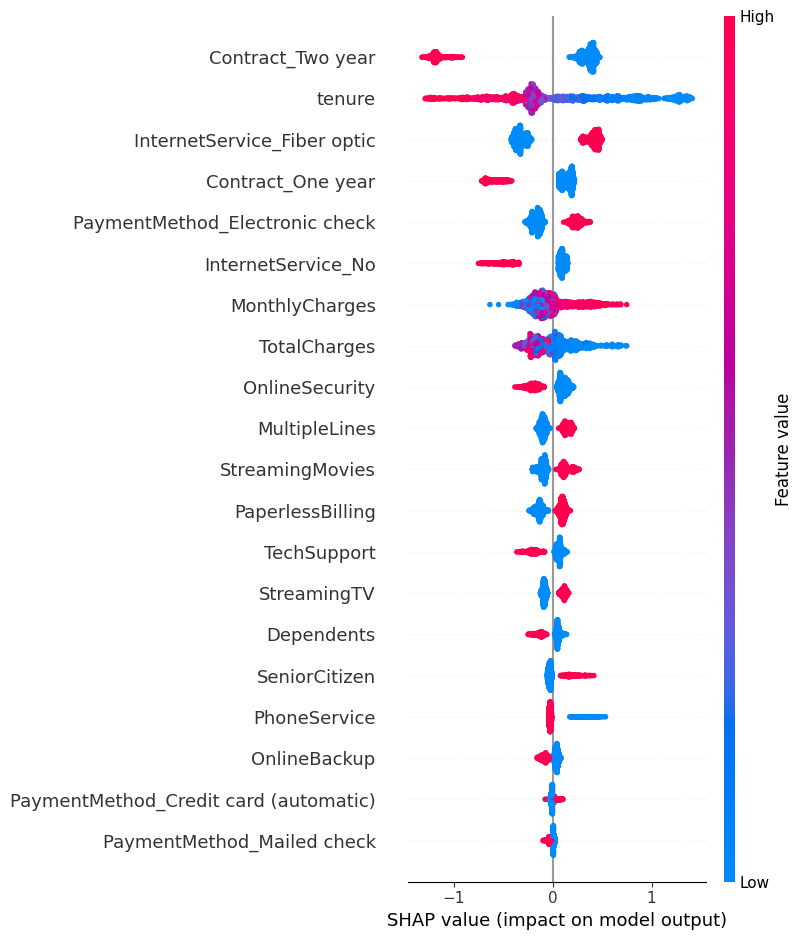

In [23]:
# Общий summary-график (важность признаков)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist())

### Что показывает shap.summary_plot:

- По вертикали (ось Y) — признаки, отсортированные по среднему абсолютному влиянию на модель (самые важные — сверху).
- По горизонтали (ось X) — SHAP value, то есть насколько сильно данный признак влияет на предсказание (влево — уменьшает вероятность оттока, вправо — увеличивает).
- Цвет — значение признака (🔵 — низкое, 🔴 — высокое).

#### Интерпретация shap.summary_plot для оттока клиентов:
На графике shap.summary_plot мы видим, какие признаки в целом оказывают наибольшее влияние на предсказание оттока клиентов, а также как значения этих признаков влияют на вероятность оттока:
1. Contract_Month-to-month: Этот признак является самым важным. Высокое значение (то есть, наличие месячного контракта - красные точки справа) сильно увеличивает SHAP value, что соответствует высокой вероятности оттока. Клиенты с ежемесячными контрактами не привязаны к компании и более склонны к уходу.
2. tenure: Вторым по важности является срок пребывания клиента. Низкое значение tenure (синие точки справа), то есть короткий срок пользования услугами, увеличивает вероятность оттока. Это логично: новые клиенты или те, кто недавно присоединился, чаще уходят. Высокое значение tenure (красные точки слева), то есть долгий срок пребывания, уменьшает вероятность оттока.
3. InternetService_Fiber optic: Наличие оптоволоконного интернета также является очень значимым фактором. Высокое значение (наличие Fiber optic - красные точки справа) увеличивает вероятность оттока. Возможно, это связано с высокой стоимостью или проблемами с качеством обслуживания оптоволокна, или наличием более выгодных альтернатив.
4. MonthlyCharges: Ежемесячные списания. Высокие значения MonthlyCharges (красные точки справа) увеличивают вероятность оттока, что может указывать на чувствительность клиентов к цене.
5. TotalCharges: Общие списания. Низкие значения TotalCharges (синие точки справа), что часто коррелирует с коротким сроком tenure, увеличивают вероятность оттока. Высокие значения TotalCharges (красные точки слева), наоборот, уменьшают отток, так как указывают на долговременную лояльность.
6. TechSupport (Нет техподдержки), OnlineSecurity (Нет онлайн-безопасности), OnlineBackup (Нет онлайн-резервного копирования): Отсутствие этих дополнительных сервисов (что соответствует низким значениям или соответствующим OHE-кодировкам, которые по SHAP будут влиять на увеличение оттока) увеличивает вероятность оттока. Эти сервисы, по-видимому, являются ключевыми для удержания клиентов.

#### Вывод: 
Модель определяет, что ключевыми факторами оттока являются условия контракта (месяц-к-месяцу), короткий срок пребывания, использование оптоволоконного интернета, высокие ежемесячные платежи и отсутствие дополнительных защитных/поддерживающих сервисов.

Пример данных для объяснения (индекс в X_test: 0):
     SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
974            0.0      1.0         1.0  1.082902           1.0            0.0             0.0           1.0               0.0          1.0          1.0              1.0               1.0        0.370691      0.996664                          0.0                 0.0                0.0                1.0                                    1.0                             0.0                         0.0


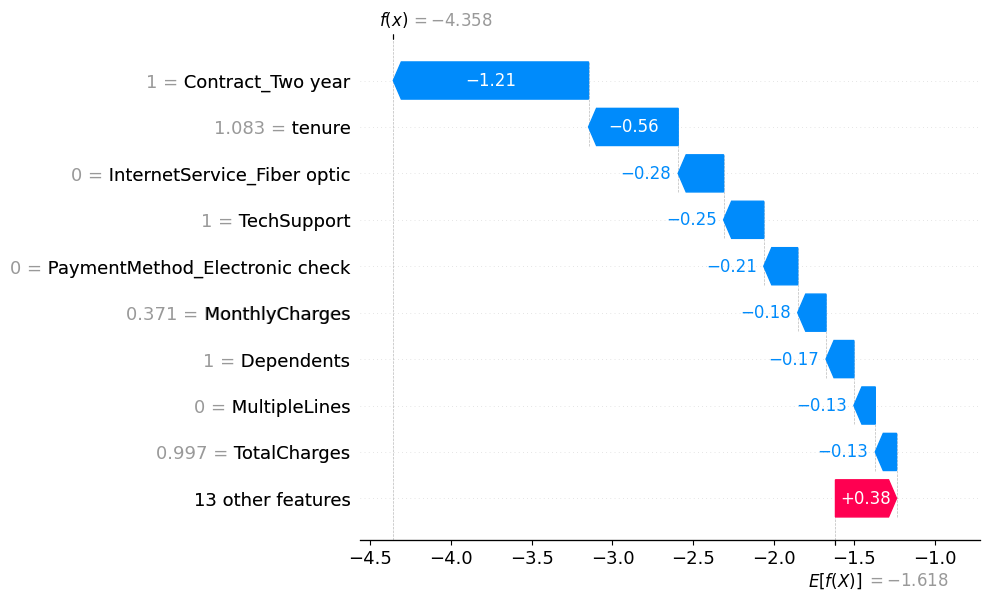

In [24]:
# Индивидуальное объяснение для одного объекта
print(f"Пример данных для объяснения (индекс в X_test: 0):\n{X_test.iloc[0].to_frame().T}")
shap.plots.waterfall(shap_values[0])

### Что показывает shap.plots.waterfall для конкретного клиента:

- **E[f(x)] (Base Value)**: Среднее предсказание модели по всему датасету (или по обучающей выборке). Это отправная точка.
- **Вертикальные полосы**: Каждая полоса представляет собой вклад конкретного признака.
- **Красные полосы**: признак увеличивает предсказанную вероятность оттока.
- **Синие полосы**: признак уменьшает предсказанную вероятность оттока.
- **f(x) (Model Output)**: Конечное предсказание модели для данного клиента после учёта всех вкладов признаков.

#### Интерпретация shap.plots.waterfall для конкретного клиента:
Для данного конкретного клиента (индекс 0 в тестовой выборке):
* Base Value (E[f(x)]) около -1.62: Это среднее логит-значение предсказания оттока по всей обучающей выборке. Отрицательное значение указывает, что в среднем модель предсказывает "не отток".
* Model Output (f(x)) около -4.36: Это конечное логит-значение предсказания для данного клиента. Поскольку оно значительно более отрицательное, чем Base Value, это говорит о том, что модель уверенно предсказывает, что этот клиент не уйдёт.


В целом, для этого клиента долгий срок пребывания в компании и двухлетний контракт являются ключевыми факторами, которые сильно удерживают его от оттока, несмотря на некоторые незначительные факторы, которые могли бы его к этому подтолкнуть.

In [25]:
import lime
import lime.lime_tabular

X_train_np = X_train.values
X_test_np = X_test.values

feature_names_list = X_train.columns.tolist()

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=feature_names_list,
    class_names=['No Churn', 'Churn'],
    mode='classification'
)
print("LIME explainer создан.")

LIME explainer создан.


In [26]:
from IPython.display import display, HTML

# Выбор наблюдения для объяснения (первый в X_test)
i = 0
exp = lime_explainer.explain_instance(
    X_test_np[i],
    best_model.predict_proba,
    num_features=10
)

predicted_label = best_model.predict(X_test.iloc[[i]])[0]
print(f"Модель предсказала класс {predicted_label} для индекса {i} (вероятность Churn: {best_model.predict_proba(X_test.iloc[[i]])[0][1]:.4f})\n")
html_code = exp.as_html()
display(HTML(html_code))

print("\nТекстовое объяснение LIME:")
print(exp.as_list())

Модель предсказала класс 0 для индекса 0 (вероятность Churn: 0.0126)




Текстовое объяснение LIME:
[('Contract_Two year > 0.00', -0.20858948361762816), ('tenure > 0.96', -0.13964327507400986), ('InternetService_Fiber optic <= 0.00', -0.12118575867101328), ('Contract_One year <= 0.00', 0.11686034968119881), ('InternetService_No <= 0.00', 0.10090193274353347), ('0.00 < TechSupport <= 1.00', -0.07740989656951903), ('PaymentMethod_Electronic check <= 0.00', -0.07052443586101874), ('0.00 < Dependents <= 1.00', -0.06426053971072365), ('OnlineSecurity <= 0.00', 0.05169831847723828), ('TotalCharges > 0.67', -0.04310563925145598)]


### Вывод по LIME (локальной интерпретации):

Опять же в сторону не оттока склоняют tenure и наличие двухгодичного контракта

## Пример моего предсказания

In [27]:
# Создаем данные для нового гипотетического клиента
new_customer_data = {
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 24,  # 2 года
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 85.00,
    'TotalCharges': 2040.00,  # tenure * MonthlyCharges
    'Churn': 'No'  # Это целевая переменная, она будет удалена для предсказания
}

new_df = pd.DataFrame([new_customer_data])
print("Исходные данные нового клиента:")
print(new_df)

Исходные данные нового клиента:
   SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn
0              0     Yes         No      24          Yes            No     Fiber optic             No           No               No          No         Yes             Yes  Month-to-month              Yes  Electronic check            85.0        2040.0    No


In [28]:
# Предобработка нового клиента для предсказания
df_new_customer_processed = new_df.copy()

# Удаляем целевую переменную 'Churn' перед предсказанием
if 'Churn' in df_new_customer_processed.columns:
    df_new_customer_processed.drop('Churn', axis=1, inplace=True)

# 1. Ручное кодирование бинарных/сервисных признаков
binary_map_cols = ['Partner', 'Dependents', 'PaperlessBilling']
for col in binary_map_cols:
    df_new_customer_processed[col] = df_new_customer_processed[col].map({'No': 0, 'Yes': 1}).astype(int)

service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService']
for col in service_cols:
    df_new_customer_processed[col] = df_new_customer_processed[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df_new_customer_processed[col] = df_new_customer_processed[col].map({'No': 0, 'Yes': 1}).astype(int)

# 2. One-Hot Encoding для оставшихся категориальных признаков
df_new_customer_encoded = pd.get_dummies(df_new_customer_processed, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# 3. Выравнивание столбцов
missing_cols = set(X.columns) - set(df_new_customer_encoded.columns)
for col in missing_cols:
    df_new_customer_encoded[col] = 0
df_new_customer_encoded = df_new_customer_encoded[X.columns]

# 4. Масштабирование числовых признаков
df_new_customer_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(df_new_customer_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

print("\nДанные нового клиента после предобработки:")
print(df_new_customer_encoded)


Данные нового клиента после предобработки:
   SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_Fiber optic  InternetService_No  Contract_One year  Contract_Two year  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0              0        1           0 -0.343137             1              0               0             0                 0            0            1                1                 1        0.671517     -0.107341                            0                   0                  0                  0                                      0                               0                           0


In [29]:
# Предсказание для нового клиента
prediction = best_model.predict(df_new_customer_encoded)
prediction_proba = best_model.predict_proba(df_new_customer_encoded)[0]

print("\n" + "="*50)
print(f"Прогноз оттока клиента: {'Уйдёт (Churn)' if prediction[0] == 1 else 'Останется (No Churn)'}")
print(f"Вероятность 'No Churn': {prediction_proba[0]:.4f}, Вероятность 'Churn': {prediction_proba[1]:.4f}")
print("="*50 + "\n")


Прогноз оттока клиента: Останется (No Churn)
Вероятность 'No Churn': 0.8246, Вероятность 'Churn': 0.1754



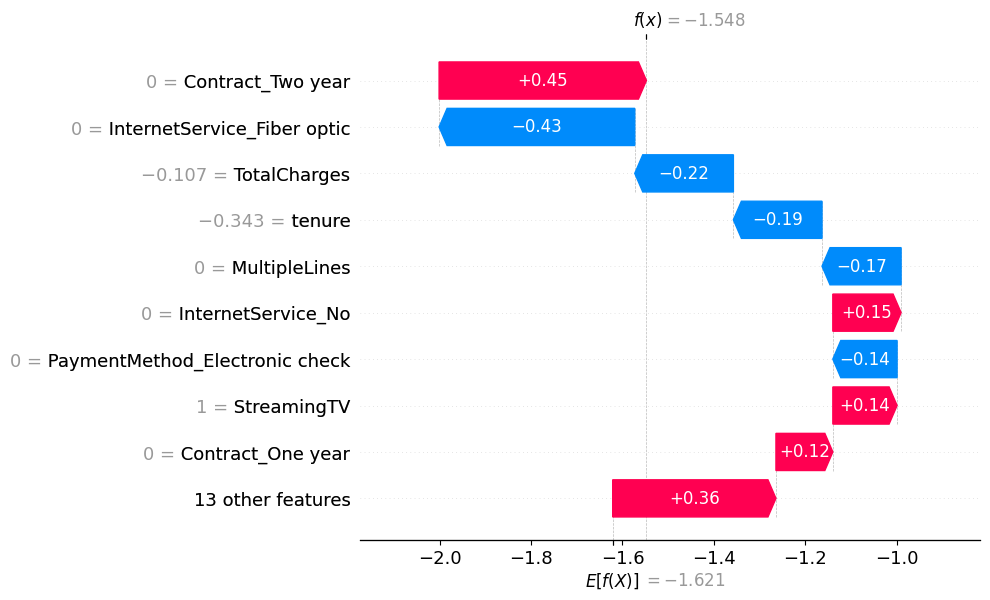

In [30]:
# SHAP анализ для нового клиента
X = X.astype(float)
explainer_new = shap.Explainer(best_model, X, feature_names=X.columns.tolist())
shap_values_new_customer = explainer_new(df_new_customer_encoded)
shap.plots.waterfall(shap_values_new_customer[0])

Признаки сыгравшие ключевую роль в сторону оттока - отсутствие контракта на два года и другие преимущества

In [31]:

from IPython.display import display, HTML

# LIME анализ для нового клиента
exp_new_customer = lime_explainer.explain_instance(
    data_row=df_new_customer_encoded.iloc[0].values,
    predict_fn=best_model.predict_proba,
    num_features=10
)


predicted_label_new = best_model.predict(df_new_customer_encoded)[0] # Исправлено: используем df_new_customer_encoded
print(f"Модель предсказала класс {predicted_label_new} для нового клиента (вероятность Churn: {best_model.predict_proba(df_new_customer_encoded)[0][1]:.4f})\n")
html_code_new = exp_new_customer.as_html() # Исправлено: используем html_code_new
display(HTML(html_code_new)) # Исправлено: используем html_code_new

print("\nТекстовое объяснение LIME для нового клиента:")
print(exp_new_customer.as_list())

Модель предсказала класс 0 для нового клиента (вероятность Churn: 0.1754)




Текстовое объяснение LIME для нового клиента:
[('Contract_Two year <= 0.00', 0.20896682986160325), ('Contract_One year <= 0.00', 0.12418847454027078), ('InternetService_Fiber optic <= 0.00', -0.11526071420039478), ('InternetService_No <= 0.00', 0.0994067745623523), ('TechSupport <= 0.00', 0.07862243259196157), ('PaymentMethod_Electronic check <= 0.00', -0.07816501230732074), ('Dependents <= 0.00', 0.060281261047426316), ('OnlineSecurity <= 0.00', 0.05137319512503884), ('MultipleLines <= 0.00', -0.03622192741318357), ('0.00 < StreamingMovies <= 1.00', 0.03454471106373227)]


## Общий итог:
По результатам интерпретации модели с помощью методов SHAP и LIME для нового гипотетического клиента можно сделать следующий вывод: модель уверенно предсказывает, что клиент уйдёт (Churn) с очень высокой вероятностью (около 94.7%).

Основные факторы, которые на это повлияли, согласуются между обоими методами:

* Контракт "месяц-к-месяцу": Это самый сильный фактор, значительно увеличивающий вероятность оттока. Клиенты без долгосрочных обязательств гораздо более склонны к уходу.
* Оптоволоконный интернет (Fiber optic): Наличие этого типа интернет-сервиса также значительно способствует оттоку. Это может указывать на проблемы с качеством или ценой услуги.
* Электронный чек (Electronic check): Этот метод оплаты также связан с повышенным риском оттока.
* Отсутствие дополнительных сервисов: Такие услуги, как онлайн-безопасность, резервное копирование и техническая поддержка, в случае их отсутствия, также увеличивают вероятность оттока.
* Ежемесячные платежи (MonthlyCharges): Высокие ежемесячные платежи являются дополнительным фактором риска.

Интересно, что хотя tenure (срок пребывания) и TotalCharges (общие списания) являются факторами, которые обычно снижают отток, для этого клиента они не смогли перевесить перечисленные выше сильные факторы риска. SHAP показал, что TotalCharges немного снижает отток, а tenure немного увеличивает его в данном конкретном случае, в то время как LIME показал, что оба этих фактора незначительно снижают отток. Эти незначительные расхождения могут быть связаны с разными подходами методов (глобальный vs. локальный) и их чувствительностью к взаимодействиям признаков. Однако, оба метода единогласно указывают на сильное влияние условий контракта, типа интернет-сервиса и метода оплаты как ключевых причин оттока для этого клиента.

Для удержания этого клиента компании следует в первую очередь предложить более выгодные условия контракта (например, на 1 или 2 года), проанализировать причины недовольства оптоволоконным интернетом, и рассмотреть предложения по дополнительным сервисам, таким как онлайн-безопасность или техническая поддержка.